# PART A

In [1345]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [1346]:
df1 = pd.read_csv('Part1+-+Normal (1).csv')

In [1347]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [1348]:
df2 = pd.read_csv('Part1+-+Type_H.csv')

In [1349]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [1350]:
df3 = pd.read_csv('Part1+-+Type_S.csv')

In [1351]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [1352]:
df1.shape

(100, 7)

In [1353]:
df2.shape

(60, 7)

In [1354]:
df3.shape

(150, 7)

In [1355]:
print(df1.columns.intersection(df2.columns).intersection(df3.columns))

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [1356]:
df = df1.append([df2,df3])

In [1357]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [1358]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [1359]:
df.shape

(310, 7)

In [1360]:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [1361]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [1362]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [1363]:
df.loc[df['Class'] == 'tp_s', 'Class'] = 'Type_S'
df.loc[df['Class'] == 'Nrmal', 'Class'] = 'Normal'
df.loc[df['Class'] == 'type_h', 'Class'] = 'Type_H'

In [1364]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [1365]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [1366]:
df['Class'] = df['Class'].astype('category')

In [1367]:
df['Class'].nunique()

3

In [1368]:
df_sample = df.sample(n = 5)
df_sample.shape

(5, 7)

In [1369]:
df_sample

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
65,48.060626,5.687032,57.057161,42.373594,95.443757,32.835877,Type_S
26,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,Type_H
107,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,Type_S
17,61.540599,19.676957,52.892229,41.863642,118.686268,4.815031,Normal
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal


In [1370]:
df.isnull().mean() * 100

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [1371]:
df_sample.shape

(5, 7)

In [1372]:
print(df1.columns.intersection(df2.columns).intersection(df3.columns))

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [1373]:
df.shape

(310, 7)

In [1374]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [1375]:
df.shape

(310, 7)

In [1376]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [1377]:
df = df.drop_duplicates()

In [1378]:
df.shape

(310, 7)

In [1379]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [1380]:
df[df.duplicated()].shape

(0, 7)

In [1381]:
df = df.reset_index()

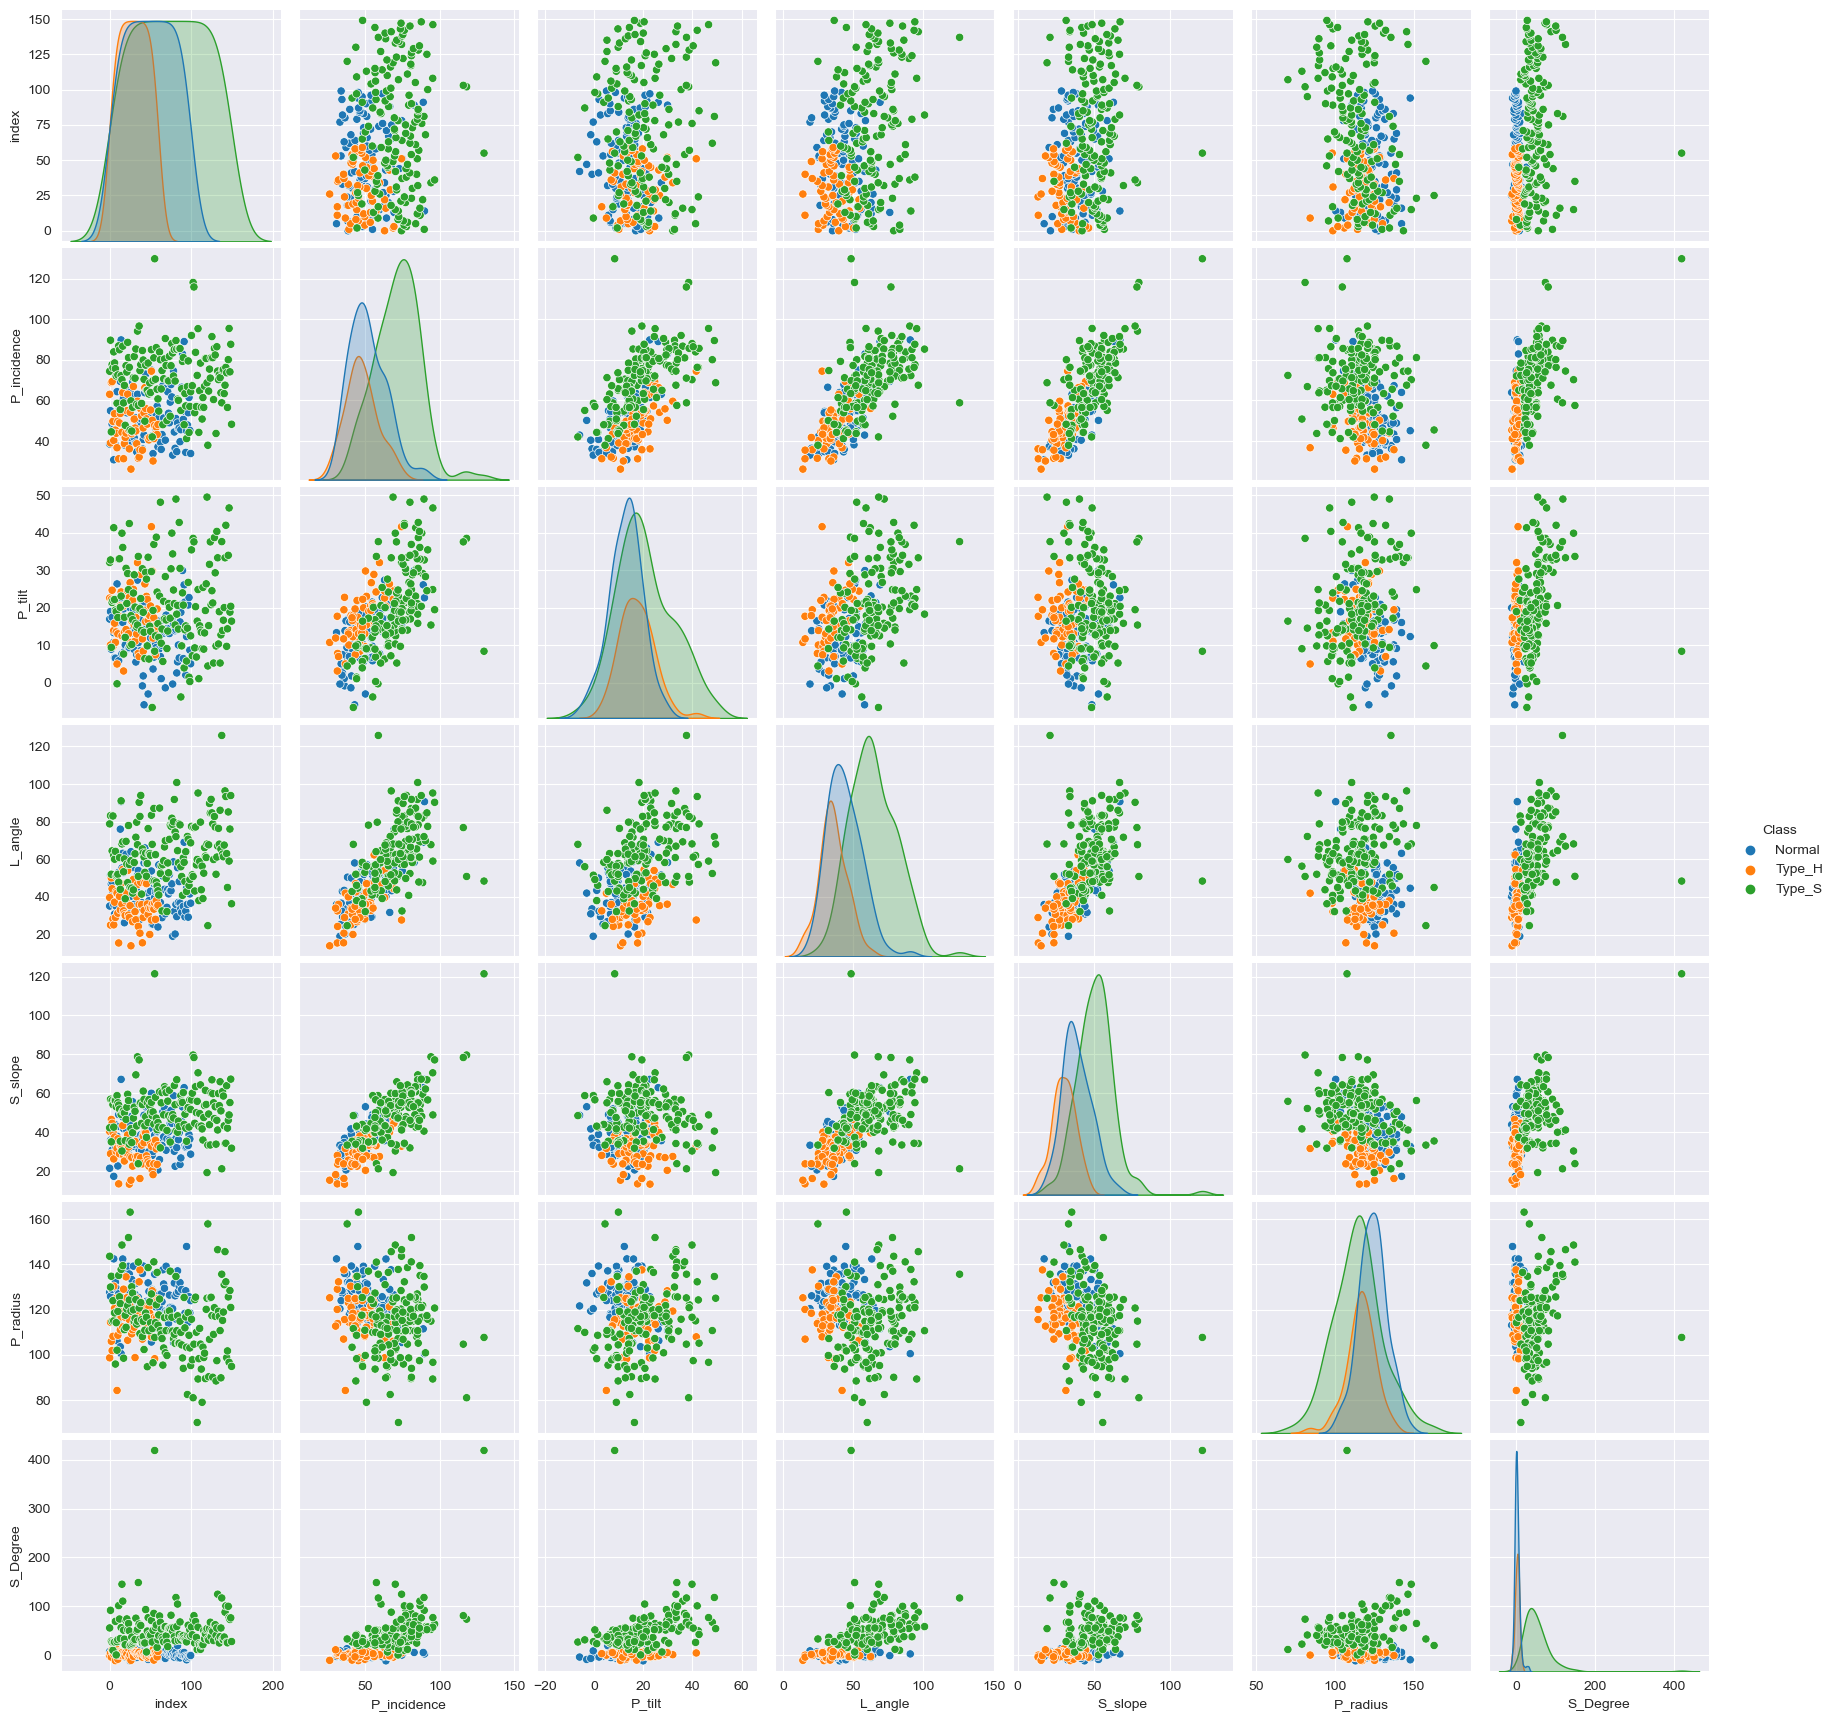

In [1382]:
sns.pairplot(df,hue='Class')

Here, S_slope and P_incidence have stronger correlation. P_radius and P_incidence have weaker correlation

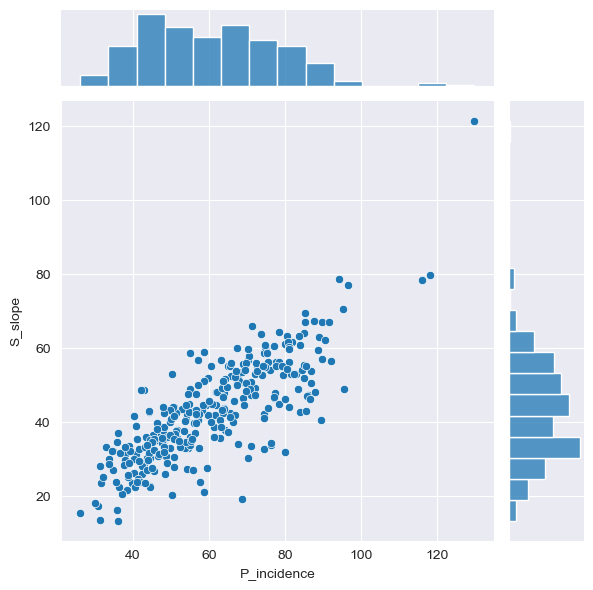

In [1383]:
sns.jointplot(data=df, x='P_incidence', y='S_slope')

The highest S_slope is around 35 and the highest P_incidence is around 45

<AxesSubplot:>

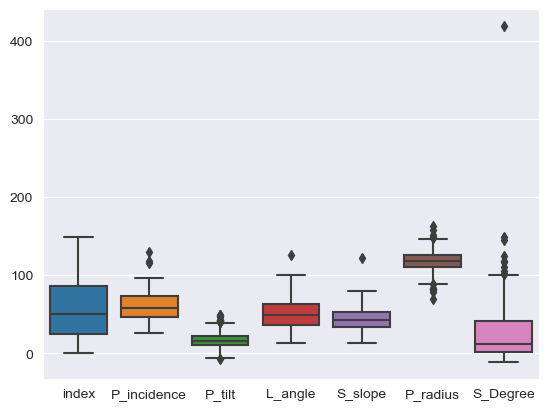

In [1384]:
sns.boxplot(data=df)

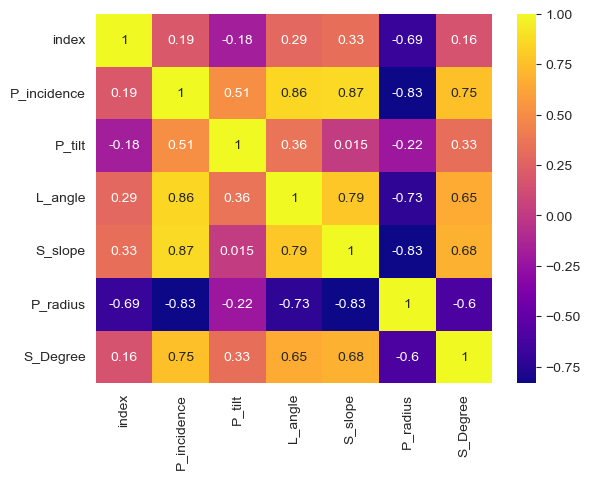

In [1385]:
df = df.corr()
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')
plt.show()

Here, S_slope and P_incidence have stronger correlation with the value of 0.87 P_radius and P_incidence have weaker correlation with the value of -0.98

### Train - Test Split

In [689]:
X = df.drop(columns = 'Class')
y = df['Class'] 

In [690]:
X.describe()

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,57.725806,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,39.385724,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,0.000000,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,25.250000,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,51.000000,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,85.750000,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,149.000000,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [691]:
X_Scaled=X.apply(zscore)

In [692]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
index,310.0,2.865092e-17,1.001617,-1.468023,-0.825891,-0.171044,0.712682,2.321190
P_incidence,310.0,1.042177e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.096889e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,2.829278e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-5.071212e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.277204e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


### KNN Classifier 

In [694]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )

In [696]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9094827586206896
Accuracy on Test data: 0.8205128205128205


Training Acuracy is 0.90 and Testing Accuracy is 0.82. Performance is less in test data.

This is due to overfitting of data

In [707]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.78      0.61      0.68        23
      Type_H       0.60      0.88      0.71        17
      Type_S       1.00      0.92      0.96        38

    accuracy                           0.82        78
   macro avg       0.79      0.80      0.79        78
weighted avg       0.85      0.82      0.82        78



In [709]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

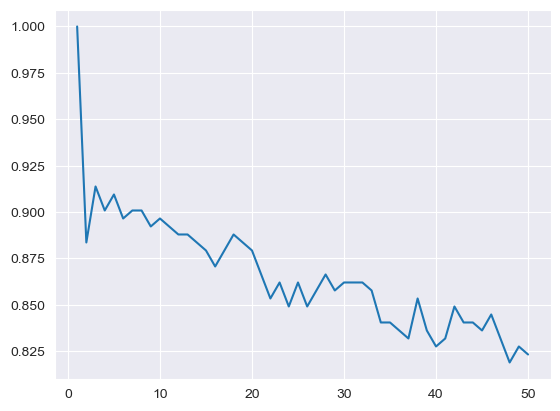

In [710]:
plt.plot(range(1,51),train_score)
plt.show()

Here training accuracy decreases when increase k value

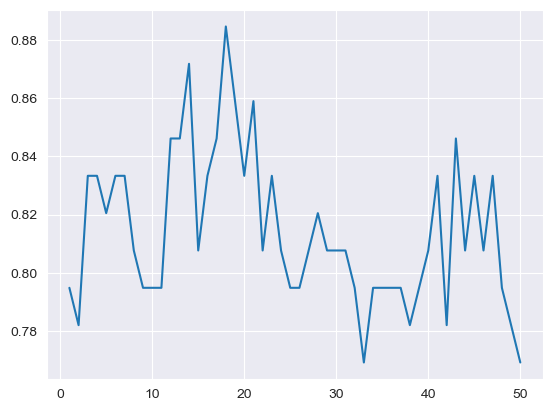

In [711]:
plt.plot(range(1,51),test_score)
plt.show()


The maximum accuracy occures when k is less than 20.

We will fix k value as less than 20.

In [712]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7948717948717948:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.71      0.65      0.68        23
      Type_H       0.57      0.71      0.63        17
      Type_S       0.97      0.92      0.95        38

    accuracy                           0.79        78
   macro avg       0.75      0.76      0.75        78
weighted avg       0.81      0.79      0.80        78

Accuracy on Training data for k 3 is 0.9137931034482759:
Accuracy on Test data for k 3 is 0.8333333333333334:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.76      0.70      0.73        23
      Type_H       0.64      0.82      0.72        17
      Type_S       1.00      0.92      0.96        38

    accuracy                           0.83        78
   macro avg       0.80      0.81      0.80        78
weighted avg       0.85      0.83     

For K=13 we have balanced train and test error

we can use k value as 13 because when we increase this value the precision becomes100% for class 2

In [713]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.877419 (0.064193)
KNN: 0.851613 (0.029565)
NB: 0.854839 (0.046187)
SVM-linear: 0.858065 (0.073842)
SVM-poly: 0.854839 (0.050492)
SVM-rbf: 0.483871 (0.070674)


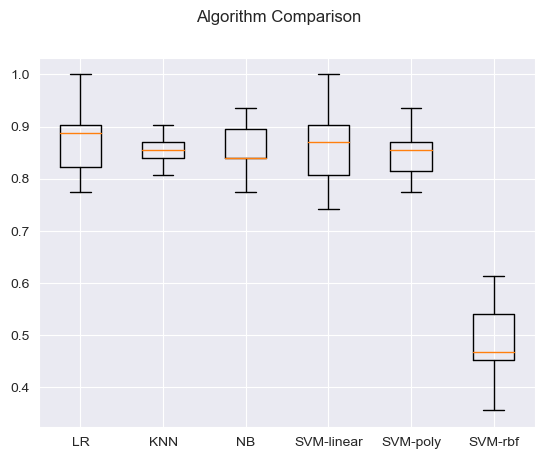

In [714]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Accuracy is more for KNN,LR and svm-linear. However the standard deviation is less for svm-linear model.

We can tell svm-linear be a better algorithm for this dataset because of high accuracy and less Standard deviation

Now check with scaled values to see whether there is improvement in model

LR: 0.890323 (0.073842)
KNN: 0.822581 (0.048387)
NB: 0.854839 (0.046187)
SVM-linear: 0.870968 (0.069186)
SVM-poly: 0.483871 (0.070674)
SVM-rbf: 0.483871 (0.070674)


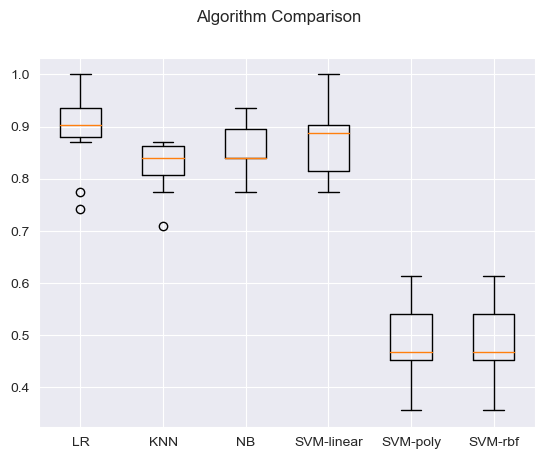

In [715]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_Scaled,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

When the scaled values are used instead of normal values Logistic regression is performing well.

Logistic Regression gives 81% accuracy with little standard deviation.

### CONCLUSION

All the variables has significant effect on target class

class belongs to type_s has higher mean value for alomst all variables

Class belongs to normal has lower values for all variables

The distribution is normal for almost all variables 

For Knn, k=13 we are getting balanced train and test error

We can use KNN as a final model because of balanced train and test error also the recall and precision values are good

# PART B

In [1263]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [1264]:
data1 = pd.read_csv('Part2+-+Data1.csv')

In [1265]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [1266]:
data1.shape

(5000, 8)

In [1267]:
data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [1268]:
data2 = pd.read_csv('Part2+-Data2.csv')

In [1269]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [1270]:
data2.shape

(5000, 7)

In [1271]:
data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [1272]:
data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [1273]:
data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [1274]:
df = pd.merge(data1, data2, on = "ID")

In [1275]:
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [1276]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [1277]:
col = ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i] = df[i].astype('category')

In [1278]:
df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

In [1279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


In [1280]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [1281]:
df.dropna(axis = 0, inplace = True)

In [1282]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [1283]:
df.drop('ID',axis=1,inplace=True)

In [1284]:
df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [1285]:
df_most_common_imputed

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [1286]:
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

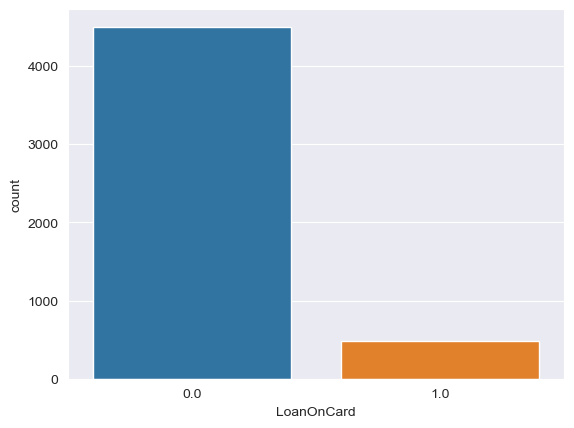

In [1287]:
sns.countplot('LoanOnCard', data = df)

In [1288]:
class_summary=df.groupby('LoanOnCard') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
0,0.0,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1,1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


Highest Spend mean values differ huge for loan and non-loan customer

Age mean is equal for each class

We can check by statistical test

In [1289]:
col=list(df.select_dtypes(include=['int64','float64']).columns)

Here we will be using two-sample unpaired t-test
Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable

H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable

In [1290]:
for i in col:
    x = np.array(df[df.LoanOnCard == 0][i]) 
    y = np.array(df[df.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.5694160158774422
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5855242526574542
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:1.527529731162187e-227
 Rejecting Null Hypothesis.HighestSpend of Loan holders and non-Loan holders are not same


 P_Value:0.9920253364424511
 Fail to Reject Null Hypothesis.ZipCode of Loan holders and non-Loan holders are  same


 P_Value:2.4144099931230367e-77
 Rejecting Null Hypothesis.MonthlyAverageSpend of Loan holders and non-Loan holders are not same


 P_Value:1.3389598194359617e-10
 Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




We can see Age,Customer since and zip code does not have effect on target variable. So dropping this column before building model

Statistical Testing of categorical features with target variable

Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)

H1: There is significant difference in hidden score for different category of target variable(Loan on card)

In [1291]:
crosstab=pd.crosstab(df['LoanOnCard'],df['HiddenScore'])
print(crosstab)

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1359  1187  873  1081
1.0           107   106  133   134


In [1292]:
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 1.5107064617649127e-06


In [1293]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('{} Rejecting Null Hypothesis. \n There is significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))

 Rejecting Null Hypothesis. 
 There is significant difference in hidden score for different category of target variable(Loan on card)


In [1294]:
cat_col=list(df.select_dtypes(include=['category']).columns)

In [1295]:
cat_col.remove('HiddenScore')
cat_col.remove('LoanOnCard')

In [1296]:
for i in cat_col:
    crosstab=pd.crosstab(df['LoanOnCard'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




### Outlier Analysis

We now imput outliers with mean

In [1297]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [1298]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




### Split into X and Y

In [1299]:
X = df.drop(columns = 'LoanOnCard')
y = df['LoanOnCard']

In [1300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

### Linear Regression Model

In [1301]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9076305220883534
Accuracy on Test data: 0.9049531459170014


Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

### Confusion matrix

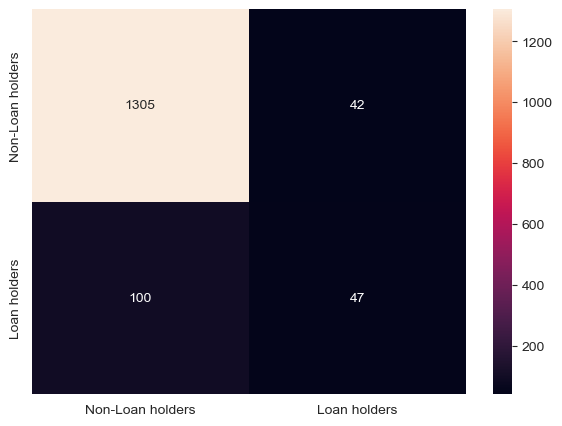

In [1302]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In the above figure 100 and 42 are the errors in the model.

we are getting very less error

In [1303]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1347
         1.0       0.53      0.32      0.40       147

    accuracy                           0.90      1494
   macro avg       0.73      0.64      0.67      1494
weighted avg       0.89      0.90      0.89      1494



Here you can see model is poor in predicting class 1 compared to class 0

Accuracy is good 

Here Recall tells that only 43% class 1 is predicted correctly from actual values

We dont have enough sample of class 1 to train the model.

We will do the sampling and check how recall values improves in this case.

In [1304]:
smote_nc = SMOTENC(categorical_features = [1,3,5], random_state = 42) #specifying categorical column numbers
x_s,y_s = smote_nc.fit_resample(X,y)

In [1305]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [1306]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


In [1307]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [1308]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [1309]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9076305220883534
Accuracy on Test data: 0.9049531459170014


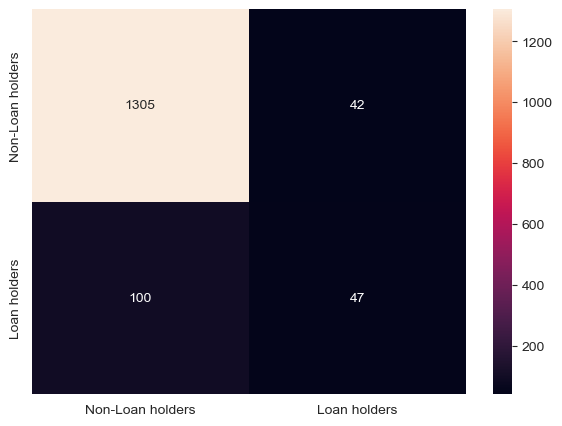

In [1310]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [1311]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1347
         1.0       0.53      0.32      0.40       147

    accuracy                           0.90      1494
   macro avg       0.73      0.64      0.67      1494
weighted avg       0.89      0.90      0.89      1494



Now we can see recall value is improved after sampling.

So whenever we have imbalance target we will use sampling method to balance the data.

### KNN model

In [1312]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )

In [1313]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9259896729776248
Accuracy on Test data: 0.9056224899598394


In [1314]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1347
         1.0       0.54      0.27      0.36       147

    accuracy                           0.91      1494
   macro avg       0.73      0.62      0.66      1494
weighted avg       0.89      0.91      0.89      1494



### SVM model

In [1321]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)


In [1322]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.908491107286288
0.9082998661311914


In [1323]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[1299   89]
 [  48   58]]


In [1324]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [1325]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9044750430292599
0.9016064257028112


In [1326]:
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9044750430292599
0.9016064257028112


In [1327]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.904188181296615
0.9016064257028112


In [1335]:
LR_model = LogisticRegression()
KNN_model = KNeighborsClassifier(n_neighbors=13)
SVM_model = SVC()

LR: 0.910241 (0.010319)
KNN: 0.902811 (0.012706)
SVM: 0.903614 (0.012636)


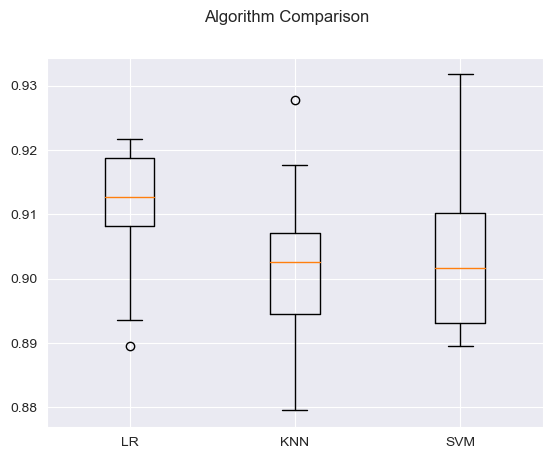

In [1339]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM', SVM_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We are getting good accuracy score in LR

LR: 0.917871 (0.018193)
KNN: 0.903012 (0.005823)
SVM: 0.903614 (0.000000)


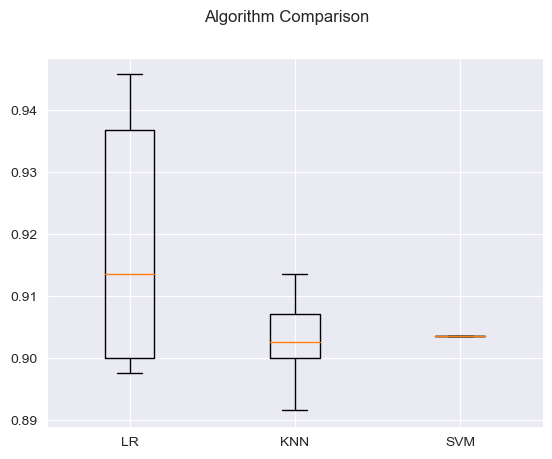

In [1341]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM', SVM_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Good improvement in accuracy in LR

Accuracy is good in final model whewn compared to base model